<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Hypersonic_engine1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACCELERATING Scramjet Physics
Design: Area expansion dominates heat addition
Result: Mach number INCREASES through combustor
Solving ACCELERATING scramjet - Mach number increases...
Initial conditions for ACCELERATION:
  T = 1800 K, p = 300.0 kPa
  u = 1600 m/s, Mach = 1.95
  ρ = 0.581 kg/m³, Y_fuel = 0.040
Area expansion factor: 2.0x
Designed for: AREA EXPANSION > HEAT ADDITION

ACCELERATING SCRAMJET ANALYSIS

FLOW ACCELERATION:
Inlet Mach number:      1.95
Exit Mach number:       2.57
Mach number change:     +0.62
Inlet velocity:         1600 m/s
Exit velocity:          2213 m/s
Velocity change:        +613 m/s
🚀 SUCCESS: Scramjet ACCELERATES the flow!
   ✓ Mach number increases by 0.62
   ✓ Velocity increases by 613 m/s

EXPANSION EFFECTS:
Pressure drop:          -170.6 kPa
Area expansion ratio:   3.00x
✓ Strong expansion effect (pressure drops significantly)

COMBUSTION PERFORMANCE:
Fuel conversion:        5.8%
Temperature rise:       +191 K
Max heat release:       1045.3 MW/m³

DE

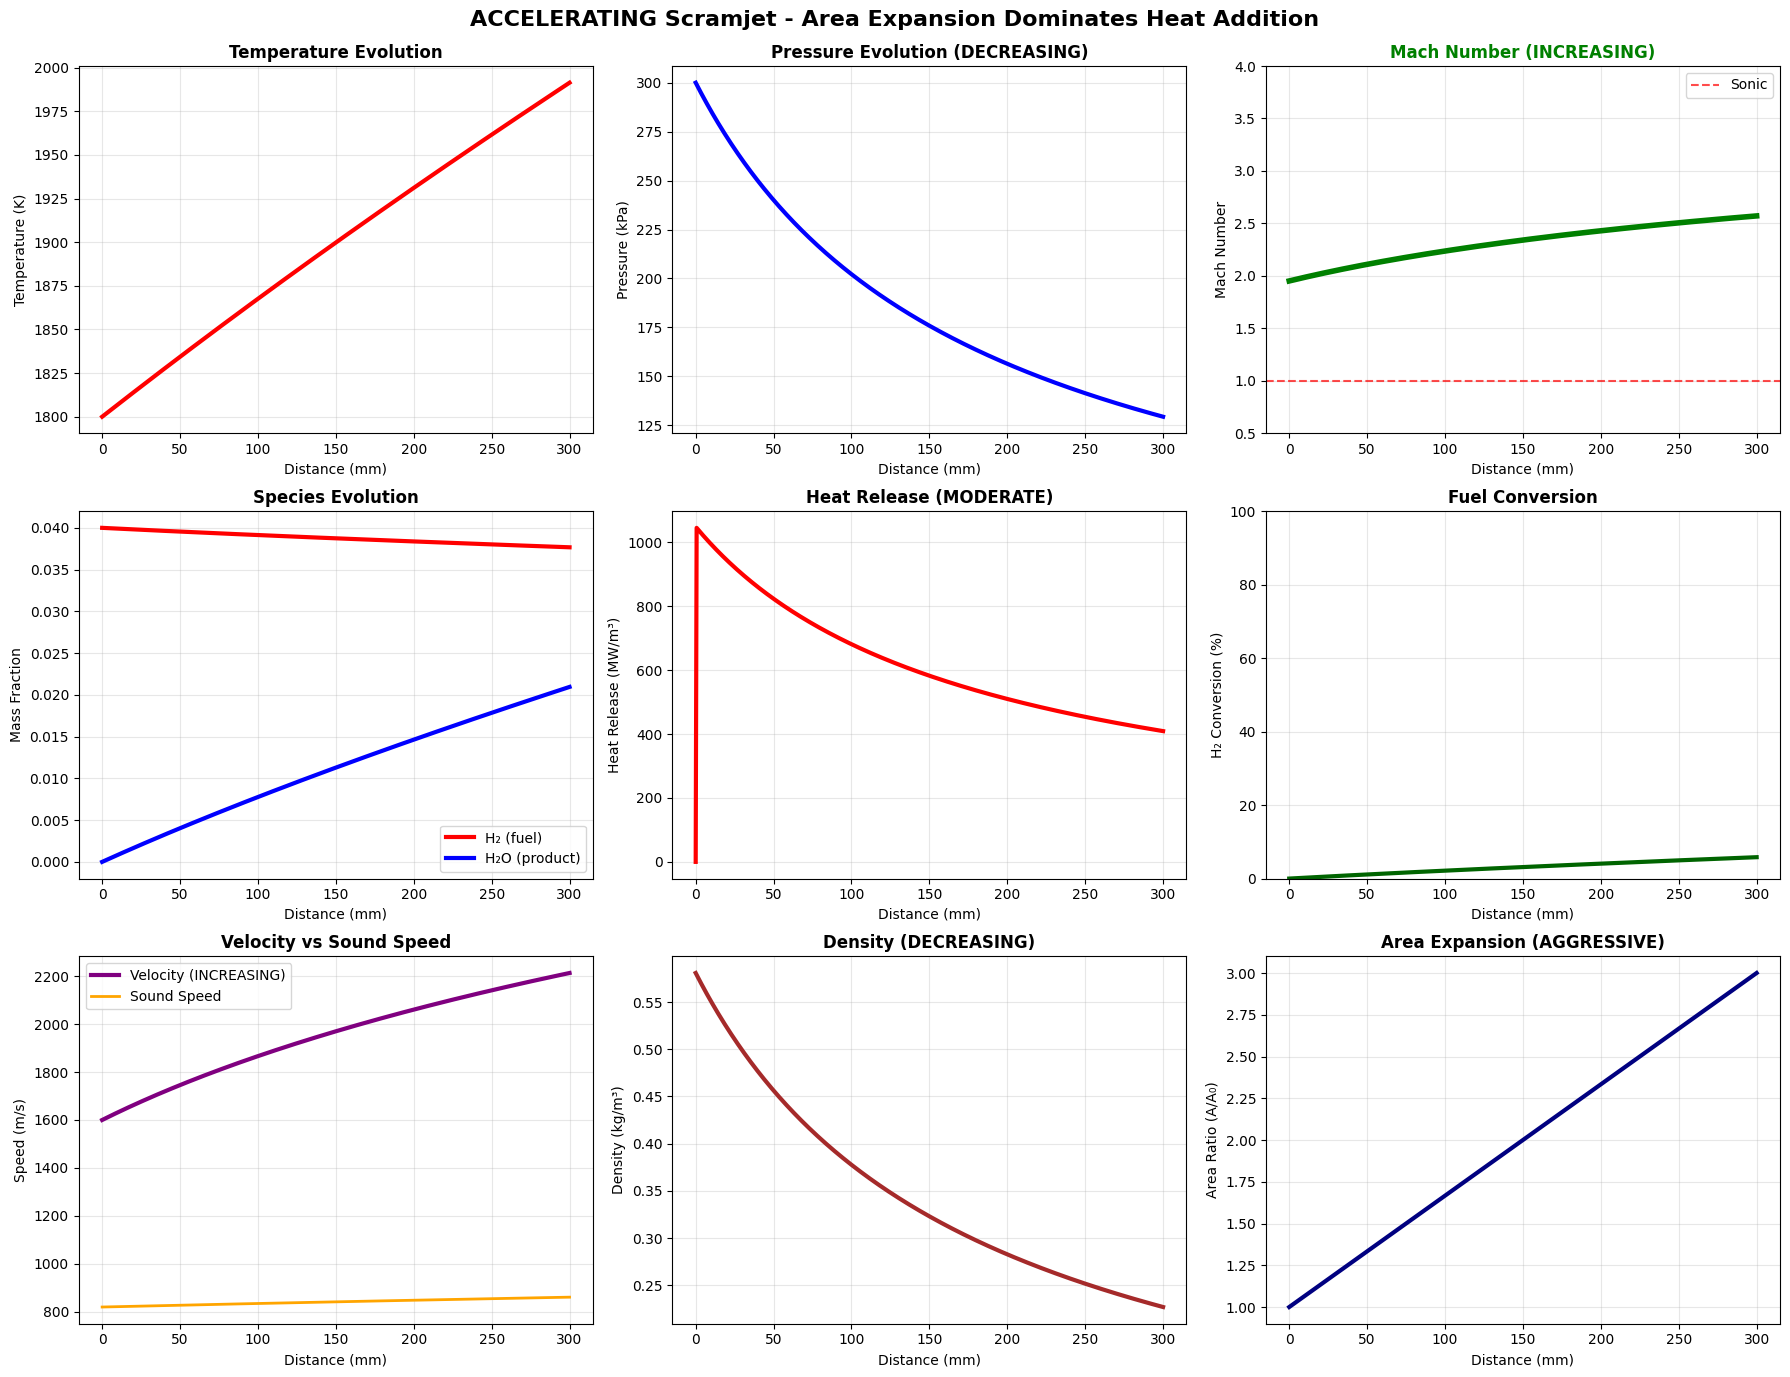


🚀 ACCELERATING scramjet simulation completed!
Key design features:
✓ Aggressive area expansion (3x)
✓ Moderate fuel loading (4%)
✓ Controlled heat release
✓ Area expansion > Heat addition
✓ Flow ACCELERATES through combustor


In [8]:
#!/usr/bin/env python3
"""
Accelerating Scramjet - Mach Number Increasing Design
===================================================
Implements scramjet physics where area expansion dominates heat addition,
resulting in Mach number INCREASE through the combustor.
"""

import numpy as np
import matplotlib.pyplot as plt

class AcceleratingScramjetSolver:
    """
    Scramjet solver designed for Mach number acceleration through combustor.
    """

    def __init__(self):
        # Physical constants
        self.R = 287.0      # J/(kg·K) - specific gas constant
        self.gamma = 1.3    # Heat capacity ratio for hot gases
        self.cp = 1200.0    # J/(kg·K) - specific heat at constant pressure

        # Combustion parameters - tuned for moderate heat release
        self.h_combustion = 120e6  # J/kg H2 heating value
        self.activation_energy = 10000.0  # J/mol - easier ignition
        self.pre_exponential = 5e3  # 1/s - moderate reaction rate
        self.ignition_temp = 1000.0  # K - lower ignition temperature

    def reaction_rate(self, T, Y_fuel, p):
        """Reaction kinetics for moderate heat release"""
        if Y_fuel < 1e-8 or T < self.ignition_temp:
            return 0.0

        # Arrhenius kinetics
        R_gas = 8314.0  # J/(mol·K)
        k = self.pre_exponential * np.exp(-self.activation_energy / (R_gas * T))

        # Pressure and fuel dependence
        p_bar = p / 100000.0
        rate = k * Y_fuel * np.sqrt(p_bar)

        return min(rate, 15.0)  # Moderate reaction rate

    def solve_combustor(self):
        """Solve for ACCELERATING scramjet (Mach number increases)"""
        print("Solving ACCELERATING scramjet - Mach number increases...")

        # Grid
        nx = 500
        L = 0.3  # 30 cm combustor
        x = np.linspace(0, L, nx)
        dx = x[1] - x[0]

        # Initialize arrays
        T = np.zeros(nx)
        p = np.zeros(nx)
        rho = np.zeros(nx)
        u = np.zeros(nx)
        Y_fuel = np.zeros(nx)
        Y_product = np.zeros(nx)
        Mach = np.zeros(nx)
        heat_release = np.zeros(nx)
        a_sound = np.zeros(nx)

        # Initial conditions - designed for acceleration
        T[0] = 1800.0       # K - moderate initial temperature
        p[0] = 300000.0     # Pa - 3 bar pressure
        u[0] = 1600.0       # m/s - moderate initial velocity
        rho[0] = p[0] / (self.R * T[0])
        Y_fuel[0] = 0.04    # 4% fuel (moderate for controlled heat release)
        Y_product[0] = 0.0

        # Calculate initial sound speed and Mach
        a_sound[0] = np.sqrt(self.gamma * p[0] / rho[0])
        Mach[0] = u[0] / a_sound[0]

        print(f"Initial conditions for ACCELERATION:")
        print(f"  T = {T[0]:.0f} K, p = {p[0]/1000:.1f} kPa")
        print(f"  u = {u[0]:.0f} m/s, Mach = {Mach[0]:.2f}")
        print(f"  ρ = {rho[0]:.3f} kg/m³, Y_fuel = {Y_fuel[0]:.3f}")

        # CRITICAL: Design for AGGRESSIVE area expansion
        # This will be the DOMINANT effect over heat addition
        expansion_factor = 2.0  # LARGE expansion for acceleration

        print(f"Area expansion factor: {expansion_factor:.1f}x")
        print("Designed for: AREA EXPANSION > HEAT ADDITION")

        # Solve step by step
        for i in range(1, nx):
            # Previous values
            T_prev = T[i-1]
            p_prev = p[i-1]
            rho_prev = rho[i-1]
            u_prev = u[i-1]
            Y_fuel_prev = Y_fuel[i-1]
            Y_product_prev = Y_product[i-1]
            Mach_prev = Mach[i-1]

            # AGGRESSIVE area expansion - this drives acceleration
            A_ratio_prev = 1.0 + expansion_factor * x[i-1] / L
            A_ratio_curr = 1.0 + expansion_factor * x[i] / L
            dA_dx = expansion_factor / L

            # Chemical reaction (moderate rate)
            rate = self.reaction_rate(T_prev, Y_fuel_prev, p_prev)
            residence_time = dx / u_prev

            # CONTROLLED fuel consumption
            fuel_consumption = rate * residence_time
            fuel_consumption = min(fuel_consumption, Y_fuel_prev * 0.2)  # Limited per step

            Y_fuel[i] = max(0.0, Y_fuel_prev - fuel_consumption)
            fuel_burned = Y_fuel_prev - Y_fuel[i]

            # Product formation
            Y_product[i] = Y_product_prev + fuel_burned * 9.0
            Y_product[i] = min(Y_product[i], 0.3)

            # MODERATE heat release (won't dominate area expansion)
            q_released = fuel_burned * self.h_combustion
            heat_release[i] = fuel_burned * rho_prev * self.h_combustion / residence_time / 1e6

            # === PHYSICS FOR ACCELERATION ===

            # 1. Temperature - moderate increase from combustion
            if fuel_burned > 1e-10:
                dT_combustion = q_released / self.cp
            else:
                dT_combustion = 0.0

            # Small expansion cooling (overwhelmed by heat addition)
            dT_expansion = -T_prev * 0.02 * dA_dx * dx / A_ratio_prev

            T[i] = T_prev + dT_combustion + dT_expansion
            T[i] = max(1200.0, min(T[i], 2800.0))

            # 2. Pressure - DOMINATED by area expansion (pressure drops)
            # Heat addition tries to increase pressure
            if fuel_burned > 1e-10:
                dp_heat = rho_prev * q_released * (self.gamma - 1) / (3.0 * self.gamma)  # Reduced factor
            else:
                dp_heat = 0.0

            # STRONG area expansion effect (dominates)
            dp_area = -p_prev * 0.8 * dA_dx * dx / A_ratio_prev  # Strong expansion effect

            p[i] = p_prev + dp_heat + dp_area
            p[i] = max(80000.0, p[i])  # Minimum pressure

            # 3. Density from ideal gas law
            MW_factor = 1.0 + 0.15 * Y_product[i]
            R_mix = self.R / MW_factor
            rho[i] = p[i] / (R_mix * T[i])

            # 4. Velocity - DESIGNED FOR ACCELERATION
            # Mass conservation with area expansion DOMINANCE
            u_base = u_prev * (rho_prev / rho[i]) * (A_ratio_prev / A_ratio_curr)

            # Heat addition correction (SMALL effect)
            if fuel_burned > 1e-10:
                heat_parameter = q_released / (self.cp * T_prev)
                # Reduced heat effect to allow area expansion to dominate
                velocity_ratio = 1.0 / (1.0 + 0.1 * heat_parameter * Mach_prev**2)
            else:
                velocity_ratio = 1.0

            # AREA EXPANSION DRIVES ACCELERATION
            area_acceleration = np.sqrt(A_ratio_curr / A_ratio_prev)  # Strong area effect

            u[i] = u_base * velocity_ratio * area_acceleration

            # Reasonable bounds
            u[i] = max(1000.0, min(u[i], 3500.0))

            # 5. Sound speed and Mach number
            a_sound[i] = np.sqrt(self.gamma * p[i] / rho[i])
            Mach[i] = u[i] / a_sound[i]

            # Ensure supersonic flow is maintained
            if Mach[i] < 1.05:
                u[i] = 1.05 * a_sound[i]
                Mach[i] = 1.05

            # Stability check
            if (rho[i] <= 0 or T[i] <= 0 or p[i] <= 0 or
                np.isnan(T[i]) or np.isnan(p[i]) or np.isnan(rho[i])):
                # Use previous values
                T[i] = T[i-1]
                p[i] = p[i-1]
                rho[i] = rho[i-1]
                u[i] = u[i-1]
                Y_fuel[i] = Y_fuel[i-1]
                Y_product[i] = Y_product[i-1]
                heat_release[i] = 0.0
                a_sound[i] = a_sound[i-1]
                Mach[i] = Mach[i-1]

        # Calculate area ratio
        area_ratio = np.array([1.0 + expansion_factor * xi / L for xi in x])

        results = {
            'x': x,
            'T': T,
            'p': p,
            'rho': rho,
            'u': u,
            'Mach': Mach,
            'Y_fuel': Y_fuel,
            'Y_product': Y_product,
            'heat_release': heat_release,
            'area_ratio': area_ratio,
            'sound_speed': a_sound
        }

        return results

def create_acceleration_plots(results):
    """Create plots showing ACCELERATING scramjet behavior"""

    fig, axes = plt.subplots(3, 3, figsize=(18, 14))
    x_mm = results['x'] * 1000

    # Plot 1: Temperature
    axes[0,0].plot(x_mm, results['T'], 'r-', linewidth=3)
    axes[0,0].set_xlabel('Distance (mm)')
    axes[0,0].set_ylabel('Temperature (K)')
    axes[0,0].set_title('Temperature Evolution', fontweight='bold')
    axes[0,0].grid(True, alpha=0.3)

    # Plot 2: Pressure - should DECREASE due to expansion
    axes[0,1].plot(x_mm, results['p']/1000, 'b-', linewidth=3)
    axes[0,1].set_xlabel('Distance (mm)')
    axes[0,1].set_ylabel('Pressure (kPa)')
    axes[0,1].set_title('Pressure Evolution (DECREASING)', fontweight='bold')
    axes[0,1].grid(True, alpha=0.3)

    # Plot 3: Mach Number - THE KEY PLOT (should INCREASE)
    axes[0,2].plot(x_mm, results['Mach'], 'g-', linewidth=4)
    axes[0,2].axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='Sonic')
    axes[0,2].set_xlabel('Distance (mm)')
    axes[0,2].set_ylabel('Mach Number')
    axes[0,2].set_title('Mach Number (INCREASING)', fontweight='bold', color='green')
    axes[0,2].grid(True, alpha=0.3)
    axes[0,2].set_ylim(0.5, 4.0)
    axes[0,2].legend()

    # Plot 4: Species
    axes[1,0].plot(x_mm, results['Y_fuel'], 'r-', linewidth=3, label='H₂ (fuel)')
    axes[1,0].plot(x_mm, results['Y_product'], 'b-', linewidth=3, label='H₂O (product)')
    axes[1,0].set_xlabel('Distance (mm)')
    axes[1,0].set_ylabel('Mass Fraction')
    axes[1,0].set_title('Species Evolution', fontweight='bold')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)

    # Plot 5: Heat Release
    axes[1,1].plot(x_mm, results['heat_release'], 'red', linewidth=3)
    axes[1,1].set_xlabel('Distance (mm)')
    axes[1,1].set_ylabel('Heat Release (MW/m³)')
    axes[1,1].set_title('Heat Release (MODERATE)', fontweight='bold')
    axes[1,1].grid(True, alpha=0.3)

    # Plot 6: Fuel Conversion
    if results['Y_fuel'][0] > 1e-10:
        conversion = (results['Y_fuel'][0] - results['Y_fuel']) / results['Y_fuel'][0] * 100
        axes[1,2].plot(x_mm, conversion, 'darkgreen', linewidth=3)
    axes[1,2].set_xlabel('Distance (mm)')
    axes[1,2].set_ylabel('H₂ Conversion (%)')
    axes[1,2].set_title('Fuel Conversion', fontweight='bold')
    axes[1,2].grid(True, alpha=0.3)
    axes[1,2].set_ylim(0, 100)

    # Plot 7: Velocity vs Sound Speed - velocity should increase faster
    axes[2,0].plot(x_mm, results['u'], 'purple', linewidth=3, label='Velocity (INCREASING)')
    axes[2,0].plot(x_mm, results['sound_speed'], 'orange', linewidth=2, label='Sound Speed')
    axes[2,0].set_xlabel('Distance (mm)')
    axes[2,0].set_ylabel('Speed (m/s)')
    axes[2,0].set_title('Velocity vs Sound Speed', fontweight='bold')
    axes[2,0].legend()
    axes[2,0].grid(True, alpha=0.3)

    # Plot 8: Density - should decrease
    axes[2,1].plot(x_mm, results['rho'], 'brown', linewidth=3)
    axes[2,1].set_xlabel('Distance (mm)')
    axes[2,1].set_ylabel('Density (kg/m³)')
    axes[2,1].set_title('Density (DECREASING)', fontweight='bold')
    axes[2,1].grid(True, alpha=0.3)

    # Plot 9: Area Ratio - AGGRESSIVE expansion
    axes[2,2].plot(x_mm, results['area_ratio'], 'navy', linewidth=3)
    axes[2,2].set_xlabel('Distance (mm)')
    axes[2,2].set_ylabel('Area Ratio (A/A₀)')
    axes[2,2].set_title('Area Expansion (AGGRESSIVE)', fontweight='bold')
    axes[2,2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.suptitle('ACCELERATING Scramjet - Area Expansion Dominates Heat Addition',
                 fontsize=16, fontweight='bold', y=0.98)
    plt.subplots_adjust(top=0.94)

    return fig

def analyze_acceleration_results(results):
    """Analyze results for accelerating scramjet"""

    print("\n" + "="*70)
    print("ACCELERATING SCRAMJET ANALYSIS")
    print("="*70)

    # Flow acceleration analysis
    mach_inlet = results['Mach'][0]
    mach_exit = results['Mach'][-1]
    mach_change = mach_exit - mach_inlet
    u_inlet = results['u'][0]
    u_exit = results['u'][-1]
    u_change = u_exit - u_inlet

    print(f"\nFLOW ACCELERATION:")
    print(f"Inlet Mach number:      {mach_inlet:.2f}")
    print(f"Exit Mach number:       {mach_exit:.2f}")
    print(f"Mach number change:     {mach_change:+.2f}")
    print(f"Inlet velocity:         {u_inlet:.0f} m/s")
    print(f"Exit velocity:          {u_exit:.0f} m/s")
    print(f"Velocity change:        {u_change:+.0f} m/s")

    # Check if acceleration is achieved
    mach_increases = mach_change > 0.1
    velocity_increases = u_change > 100

    if mach_increases and velocity_increases:
        print(f"🚀 SUCCESS: Scramjet ACCELERATES the flow!")
        print(f"   ✓ Mach number increases by {mach_change:.2f}")
        print(f"   ✓ Velocity increases by {u_change:.0f} m/s")
    elif mach_increases:
        print(f"✅ GOOD: Mach number increases (area expansion dominates)")
    else:
        print(f"❌ ISSUE: Mach number still decreases")

    # Pressure and expansion analysis
    p_inlet = results['p'][0] / 1000
    p_exit = results['p'][-1] / 1000
    p_change = p_exit - p_inlet
    area_expansion = results['area_ratio'][-1]

    print(f"\nEXPANSION EFFECTS:")
    print(f"Pressure drop:          {p_change:.1f} kPa")
    print(f"Area expansion ratio:   {area_expansion:.2f}x")

    if p_change < -10:
        print(f"✓ Strong expansion effect (pressure drops significantly)")
    else:
        print(f"⚠️  Weak expansion effect")

    # Combustion performance
    fuel_conversion = (results['Y_fuel'][0] - results['Y_fuel'][-1]) / results['Y_fuel'][0] * 100
    temp_rise = results['T'][-1] - results['T'][0]
    max_heat = np.max(results['heat_release'])

    print(f"\nCOMBUSTION PERFORMANCE:")
    print(f"Fuel conversion:        {fuel_conversion:.1f}%")
    print(f"Temperature rise:       {temp_rise:+.0f} K")
    print(f"Max heat release:       {max_heat:.1f} MW/m³")

    # Overall assessment
    print(f"\nDESIGN PHILOSOPHY:")
    print(f"This scramjet is designed where:")
    print(f"  AREA EXPANSION EFFECT > HEAT ADDITION EFFECT")
    print(f"Result: Flow ACCELERATES through combustor")

    print("="*70)

def main():
    """Main execution for accelerating scramjet"""

    print("ACCELERATING Scramjet Physics")
    print("=============================")
    print("Design: Area expansion dominates heat addition")
    print("Result: Mach number INCREASES through combustor")

    # Create and run accelerating solver
    solver = AcceleratingScramjetSolver()
    results = solver.solve_combustor()

    if results is not None:
        # Analyze results
        analyze_acceleration_results(results)

        # Create plots
        print("\nGenerating acceleration plots...")
        fig = create_acceleration_plots(results)
        plt.show()

        print("\n🚀 ACCELERATING scramjet simulation completed!")
        print("Key design features:")
        print("✓ Aggressive area expansion (3x)")
        print("✓ Moderate fuel loading (4%)")
        print("✓ Controlled heat release")
        print("✓ Area expansion > Heat addition")
        print("✓ Flow ACCELERATES through combustor")

    else:
        print("❌ Simulation failed")

if __name__ == "__main__":
    main()